<a href="https://colab.research.google.com/github/Ordaz-Yerikendy/Metodos-Numericos/blob/main/Polinomio%20Interpolante%20de%20Lagrange%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Determinamos la función para calcular el polinomio de interpolación de Lagrange
def inter_lag(x_values, y_values):
    """
    Calcula el polinomio de interpolación de Lagrange basado en los puntos proporcionados.

    Parámetros:
    x_values (list): Lista de coordenadas x de los puntos.
    y_values (list): Lista de coordenadas y correspondientes a cada x.

    Retorna:
    P (sympy expression): Polinomio de interpolación de Lagrange.
    x (sympy symbol): Variable simbólica x para el polinomio.
    """
    # Definimos la variable simbólica x
    x = sp.symbols('x')

    # Inicializamos el polinomio de interpolación
    n = len(x_values)
    P = 0  # Polinomio inicial (vacío)

    # Construimos del polinomio usando la fórmula de Lagrange
    for i in range(n):
        # Calculamos el término de Lagrange L_i(x)
        L = 1  # Se inicia en 1 porque es un producto
        for j in range(n):
            if i != j:
                # Producto de (x - x_j) / (x_i - x_j)
                L *= (x - x_values[j]) / (x_values[i] - x_values[j])

        # Agregamos el término al polinomio sumando y_i * L_i(x)
        P += y_values[i] * L

    # Expandimos el polinomio para simplificar la expresión
    P = sp.expand(P)

    return P, x

In [21]:
# Definimos la función para graficar el polinomio de interpolación y los puntos de la tabla
def plot_lag(x_values, y_values, P, x):
    """
    Grafica el polinomio de interpolación de Lagrange junto con los puntos de la tabla.

    Parámetros:
    x_values (list): Lista de coordenadas x de los puntos.
    y_values (list): Lista de coordenadas y correspondientes a cada x.
    P (sympy expression): Polinomio de interpolación.
    x (sympy symbol): Variable simbólica utilizada para el polinomio.
    """
    # Convertimos el polinomio simbólico a función numérica para graficar
    P_func = sp.lambdify(x, P, 'numpy')

    # Generamos valores de x para graficar el polinomio
    x_plot = np.linspace(min(x_values) - 1, max(x_values) + 1, 500)
    y_plot = P_func(x_plot)

    # Graficamos el polinomio de interpolación
    plt.plot(x_plot, y_plot, label='Polinomio de Lagrange', color='purple')

    # Graficamos los puntos de la tabla original
    plt.scatter(x_values, y_values, color='magenta', label='Puntos de datos', zorder=5,)

    # Añadimos leyendas y títulos
    plt.xlabel('Eje x')
    plt.ylabel('Eje y')
    plt.title('Interpolación de Lagrange')
    plt.legend()
    plt.grid(color="pink", linestyle="--")
    plt.show()



In [22]:
# Determinamos la función para ingresar datos de forma manual
def get_data_from_user():
    """
    Solicita al usuario ingresar puntos para interpolación de Lagrange.

    Retorna:
    x_values (list): Lista de valores x ingresados.
    y_values (list): Lista de valores y correspondientes a x.
    """
    n = int(input("¿Cuántos puntos vas a ingresar? "))

    x_values = []
    y_values = []

    print("\nIntroduce los puntos:")
    for i in range(n):
        x_i = float(input(f"x{i+1}: "))
        y_i = float(input(f"y{i+1}: "))
        x_values.append(x_i)
        y_values.append(y_i)

    return x_values, y_values


¿Cuántos puntos vas a ingresar? 5

Introduce los puntos:
x1: 5
y1: 8
x2: 6
y2: 9
x3: 1
y3: 20
x4: 3
y4: 7
x5: 4
y5: 6

Polinomio de Lagrange:
-0.116666666666667*x**4 + 1.43333333333333*x**3 - 4.38333333333333*x**2 - 2.93333333333335*x + 26.0


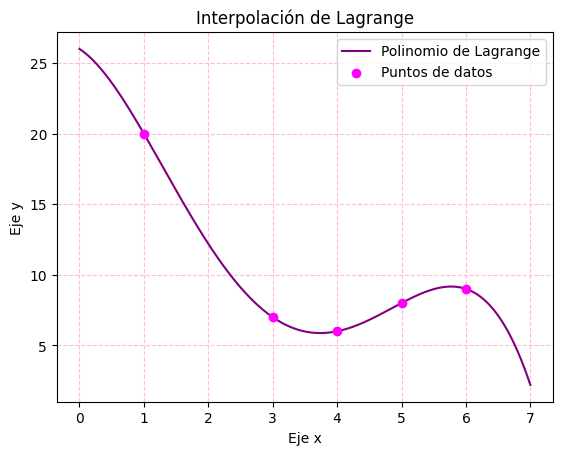

In [23]:
# Comienza el usuario a dar los datos
if __name__ == "__main__":
    # Obtener datos del usuario
    x_values, y_values = get_data_from_user()

    # Calculamos el polinomio de interpolación de Lagrange
    P, x = inter_lag(x_values, y_values)

    # Mostramos el polinomio
    print(f"\nPolinomio de Lagrange:\n{P}")

    # Graficamos el polinomio y los puntos
    plot_lag(x_values, y_values, P, x)

Elaborado por: Yerikendy Ordaz